In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import _tree
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
import plotly.express as px
from pulp import LpProblem, LpVariable, LpMaximize, lpSum, LpStatus, value
from sklearn.decomposition import PCA

import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("./data/anemia.csv")

In [3]:
df.head()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia


In [4]:
from sklearn.preprocessing import LabelEncoder
le_class = LabelEncoder()
df["Diagnosis"] = le_class.fit_transform(df["Diagnosis"])

In [27]:
X = df.drop("Diagnosis", axis = 1)
y = df[["Diagnosis"]]

feature_names = X.columns
target_names = y.columns

In [28]:


# Load the breast cancer dataset
# data = load_breast_cancer()
# X = data.data
# y = data.target
# feature_names = data.feature_names
# target_names = data.target_names

# Train RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X, y)


/Users/DubeyA-Dev/miniconda3/envs/taylor/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=10, random_state=42)

In [29]:
df

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.00,43.200,50.100,4.30000,5.00000,2.77,7.3,24.2000,87.7,26.3,30.1,189.0,12.500000,0.17000,5
1,10.00,42.400,52.300,4.20000,5.30000,2.84,7.3,25.0000,88.2,25.7,20.2,180.0,12.500000,0.16000,5
2,7.20,30.700,60.700,2.20000,4.40000,3.97,9.0,30.5000,77.0,22.6,29.5,148.0,14.300000,0.14000,1
3,6.00,30.200,63.500,1.80000,3.80000,4.22,3.8,32.8000,77.9,23.2,29.8,143.0,11.300000,0.12000,1
4,4.20,39.100,53.700,1.60000,2.30000,3.93,0.4,316.0000,80.6,23.9,29.7,236.0,12.800000,0.22000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,4.40,25.845,77.511,1.88076,5.14094,4.86,13.5,46.1526,80.7,27.7,34.4,180.0,14.312512,0.26028,0
1277,5.60,25.845,77.511,1.88076,5.14094,4.85,15.0,46.1526,91.7,31.0,33.8,215.0,14.312512,0.26028,0
1278,9.20,25.845,77.511,1.88076,5.14094,4.47,13.1,46.1526,88.7,29.3,33.0,329.0,14.312512,0.26028,0
1279,6.48,25.845,77.511,1.88076,5.14094,4.75,13.2,46.1526,86.7,27.9,32.1,174.0,14.312512,0.26028,0


## Calculating feature usage in decision paths and feature importance based on impurity reduction

/var/folders/tk/qh_5gfz51996p7zxwjyl8r140000gp/T/ipykernel_38999/2676868043.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=features, palette='viridis')


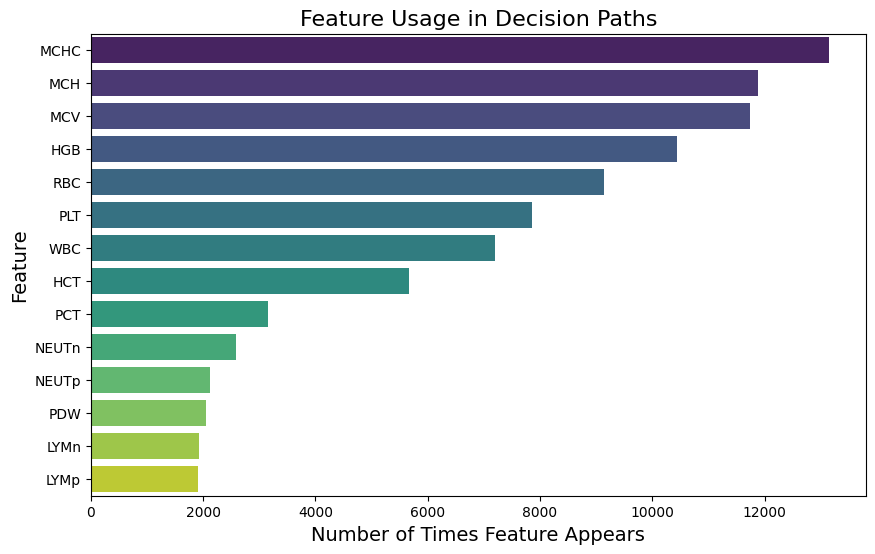

/var/folders/tk/qh_5gfz51996p7zxwjyl8r140000gp/T/ipykernel_38999/2676868043.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=features, palette='viridis')


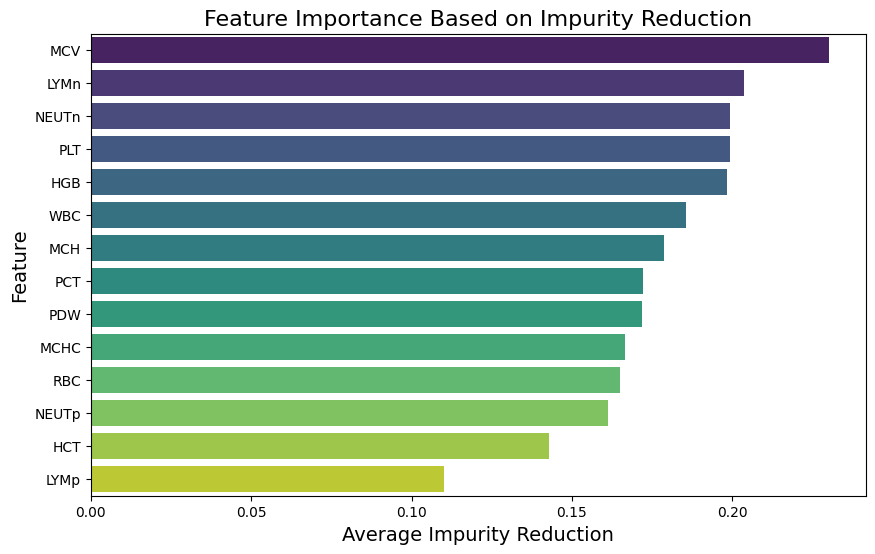

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

def get_decision_paths(model, X):
    decision_paths = []
    
    # Iterate over each tree in the forest
    for tree in model.estimators_:
        tree_paths = extract_tree_paths(tree, X)
        decision_paths.append(tree_paths)
    
    return decision_paths

def extract_tree_paths(tree, X):
    # Get the decision tree structure
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right
    feature = tree.tree_.feature
    threshold = tree.tree_.threshold
    value = tree.tree_.value
    
    paths = []
    
    # For each sample in X, trace the path from root to leaf
    for _, sample in X.iterrows():
        path = []
        node = 0  # Start from the root node
        
        while children_left[node] != children_right[node]:  # Not a leaf node
            feature_index = feature[node]
            threshold_value = threshold[node]
            feature_name = X.columns[feature_index]
            
            # Record the decision (feature, threshold, direction)
            if sample[feature_name] <= threshold_value:
                path.append((feature_name, threshold_value, "left"))
                node = children_left[node]
            else:
                path.append((feature_name, threshold_value, "right"))
                node = children_right[node]
        
        # At the leaf node, record the leaf prediction
        leaf_prediction = np.argmax(value[node])
        paths.append((path, leaf_prediction))
    
    return paths

def calculate_split_importance(model):
    importance_weights = []
    
    for tree in model.estimators_:
        tree_importance = extract_split_importance(tree)
        importance_weights.append(tree_importance)
    
    return importance_weights

def extract_split_importance(tree):
    # Get the decision tree structure
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right
    feature = tree.tree_.feature
    impurity = tree.tree_.impurity
    
    importance_weights = []
    
    for node in range(tree.tree_.node_count):
        if children_left[node] != children_right[node]:  # Not a leaf node
            feature_index = feature[node]
            left_impurity = impurity[children_left[node]]
            right_impurity = impurity[children_right[node]]
            current_impurity = impurity[node]
            
            # Calculate the impurity reduction (importance weight)
            impurity_reduction = current_impurity - (left_impurity + right_impurity) / 2
            importance_weights.append((feature_index, impurity_reduction))
    
    return importance_weights

def visualize_decision_paths(decision_paths, feature_names):
    feature_count = {feature: 0 for feature in feature_names}
    
    # Count feature usage across all decision paths
    for tree_paths in decision_paths:
        for path, _ in tree_paths:
            for feature, _, _ in path:
                feature_count[feature] += 1

    # Create a bar plot for feature usage count
    feature_usage = list(feature_count.items())
    feature_usage.sort(key=lambda x: x[1], reverse=True)

    features, counts = zip(*feature_usage)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts, y=features, palette='viridis')
    plt.title('Feature Usage in Decision Paths', fontsize=16)
    plt.xlabel('Number of Times Feature Appears', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.show()

def visualize_feature_importance(importance_weights, feature_names):
    avg_importance = {feature: [] for feature in feature_names}
    
    # Aggregate importance across all trees
    for tree_importance in importance_weights:
        for feature_index, imp in tree_importance:
            feature_name = feature_names[feature_index]
            avg_importance[feature_name].append(imp)
    
    avg_importance = {feature: np.mean(imp) for feature, imp in avg_importance.items() if imp}
    
    # Sort by importance
    sorted_importance = sorted(avg_importance.items(), key=lambda x: x[1], reverse=True)
    features, importance = zip(*sorted_importance)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance, y=features, palette='viridis')
    plt.title('Feature Importance Based on Impurity Reduction', fontsize=16)
    plt.xlabel('Average Impurity Reduction', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.show()

def visualize_decision_trees(model, feature_names, target_names):
    for i, tree in enumerate(model.estimators_):
        plt.figure(figsize=(20, 10))
        plot_tree(tree, feature_names=feature_names, class_names=target_names, filled=True)
        plt.title(f"Decision Tree {i + 1}")
        plt.show()

# Get decision paths and importance weights
decision_paths = get_decision_paths(rf, X)
importance_weights = calculate_split_importance(rf)

# Visualize decision paths
visualize_decision_paths(decision_paths, X.columns)

# Visualize feature importance
visualize_feature_importance(importance_weights, X.columns)

# Visualize decision trees
# visualize_decision_trees(rf, X.columns, target_names)


In [31]:
# Function to extract decision paths/rules

from sklearn.preprocessing import LabelEncoder
def extract_rule_paths(tree, feature_names):
    tree_ = tree.tree_
    feature = tree_.feature
    threshold = tree_.threshold
    rules = []

    def recurse(node, current_rule):
        if tree_.children_left[node] == _tree.TREE_LEAF:
            rule_str = " AND ".join(current_rule)
            rules.append(rule_str)
        else:
            rule_left = f"({feature_names[feature[node]]} <= {threshold[node]:.2f})"
            current_rule.append(rule_left)
            recurse(tree_.children_left[node], current_rule)
            current_rule.pop()

            rule_right = f"({feature_names[feature[node]]} > {threshold[node]:.2f})"
            current_rule.append(rule_right)
            recurse(tree_.children_right[node], current_rule)
            current_rule.pop()

    recurse(0, [])
    return rules

# Custom rule encoder that preserves the structure
def encode_rule_structure(rules):
    encoded_rules = []
    
    # Create a label encoder for feature names (make sure to fit it first)
    feature_encoder = LabelEncoder()
    feature_encoder.fit(feature_names)  # Fit encoder on all feature names
    
    for rule in rules:
        encoded_rule = []
        
        # Split the rule into components and encode
        components = rule.split(" AND ")
        for component in components:
            # Handle the comparison operators and extract feature names
            if "<=" in component:
                feature_name, threshold = component.split(" <= ")
                feature_name = feature_name.strip("()")  # Clean up extra characters
                encoded_rule.append(f"FEAT_{feature_encoder.transform([feature_name])[0]}_LTE_{threshold}")
            elif ">" in component:
                feature_name, threshold = component.split(" > ")
                feature_name = feature_name.strip("()")  # Clean up extra characters
                encoded_rule.append(f"FEAT_{feature_encoder.transform([feature_name])[0]}_GT_{threshold}")
        
        encoded_rules.append(" AND ".join(encoded_rule))
    
    return encoded_rules

# Extract all rules from Random Forest models
all_rule_texts = []
for est in rf.estimators_:
    rules = extract_rule_paths(est, feature_names)
    all_rule_texts.extend(rules)

# Encode the rules
encoded_rules = encode_rule_structure(all_rule_texts)

# Show some of the encoded rules
for i in range(10):
    print(encoded_rules[i])


FEAT_0_LTE_40.40) AND FEAT_4_LTE_24.55) AND FEAT_4_LTE_23.65) AND FEAT_11_LTE_468.50) AND FEAT_0_LTE_35.30) AND FEAT_4_LTE_22.10)
FEAT_0_LTE_40.40) AND FEAT_4_LTE_24.55) AND FEAT_4_LTE_23.65) AND FEAT_11_LTE_468.50) AND FEAT_0_LTE_35.30) AND FEAT_4_GT_22.10) AND FEAT_5_LTE_32.00)
FEAT_0_LTE_40.40) AND FEAT_4_LTE_24.55) AND FEAT_4_LTE_23.65) AND FEAT_11_LTE_468.50) AND FEAT_0_LTE_35.30) AND FEAT_4_GT_22.10) AND FEAT_5_GT_32.00)
FEAT_0_LTE_40.40) AND FEAT_4_LTE_24.55) AND FEAT_4_LTE_23.65) AND FEAT_11_LTE_468.50) AND FEAT_0_GT_35.30) AND FEAT_6_LTE_72.70)
FEAT_0_LTE_40.40) AND FEAT_4_LTE_24.55) AND FEAT_4_LTE_23.65) AND FEAT_11_LTE_468.50) AND FEAT_0_GT_35.30) AND FEAT_6_GT_72.70) AND FEAT_5_LTE_29.20) AND FEAT_0_LTE_36.00)
FEAT_0_LTE_40.40) AND FEAT_4_LTE_24.55) AND FEAT_4_LTE_23.65) AND FEAT_11_LTE_468.50) AND FEAT_0_GT_35.30) AND FEAT_6_GT_72.70) AND FEAT_5_LTE_29.20) AND FEAT_0_GT_36.00)
FEAT_0_LTE_40.40) AND FEAT_4_LTE_24.55) AND FEAT_4_LTE_23.65) AND FEAT_11_LTE_468.50) AND FEAT_0_

In [32]:
# Function to decode an encoded rule
def decode_rule_structure(encoded_rules):
    decoded_rules = []

    # Create a label encoder for feature names (must fit the same encoder used for encoding)
    feature_encoder = LabelEncoder()
    feature_encoder.fit(feature_names)  # Fit encoder on all feature names
    
    for encoded_rule in encoded_rules:
        decoded_rule = []
        
        # Split the encoded rule into components
        components = encoded_rule.split(" AND ")
        
        for component in components:
            # Extract the feature index and threshold from the encoded part
            if "_LTE_" in component:  # Handling "<="
                feature_index, threshold = component.split("_LTE_")
                feature_index = int(feature_index.replace("FEAT_", ""))
                decoded_feature = feature_encoder.inverse_transform([feature_index])[0]  # Decode feature name
                decoded_rule.append(f"({decoded_feature} <= {threshold})")
            elif "_GT_" in component:  # Handling ">"
                feature_index, threshold = component.split("_GT_")
                feature_index = int(feature_index.replace("FEAT_", ""))
                decoded_feature = feature_encoder.inverse_transform([feature_index])[0]  # Decode feature name
                decoded_rule.append(f"({decoded_feature} > {threshold})")
        
        decoded_rules.append(" AND ".join(decoded_rule))
    
    return decoded_rules

# Example of decoding the encoded rules
encoded_rule_example = ["FEAT_0_LTE_40.40) AND FEAT_4_LTE_24.55) AND FEAT_4_GT_23.65) AND FEAT_5_LTE_30.40) AND FEAT_11_LTE_148.00) AND FEAT_13_LTE_3.65)"]  # Example encoded rule
decoded_rule = decode_rule_structure(encoded_rule_example)

# Show the decoded rule
print(decoded_rule[0])  # Example output: (mean radius <= 15.5) AND (mean smoothness > 20.1)


(HCT <= 40.40)) AND (MCH <= 24.55)) AND (MCH > 23.65)) AND (MCHC <= 30.40)) AND (PLT <= 148.00)) AND (WBC <= 3.65))


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import AgglomerativeClustering

# Step 1: Vectorize the encoded rules using CountVectorizer or TfidfVectorizer
vectorizer = CountVectorizer()  # You can also try TfidfVectorizer
encoded_rule_vectors = vectorizer.fit_transform(encoded_rules)

# Step 2: Perform hierarchical clustering on the vectorized encoded rules
n_clusters = 5
clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='cosine', linkage='average')
labels = clustering.fit_predict(encoded_rule_vectors.toarray())

# Step 3: Group the rules by their clusters
clustered_rules = {i: [] for i in range(n_clusters)}
for encoded_rule, label in zip(encoded_rules, labels):
    clustered_rules[label].append(encoded_rule)

# Example: Print some clustered rules
for cluster_id, rules in clustered_rules.items():
    print(f"Cluster {cluster_id}:")
    for rule in rules[:5]:  # Show first 5 rules in each cluster
        print(f"  {rule}")
    print("\n")


Cluster 0:
  FEAT_5_GT_31.95) AND FEAT_6_LTE_89.35) AND FEAT_6_LTE_79.25) AND FEAT_1_LTE_13.05)
  FEAT_5_GT_31.95) AND FEAT_6_LTE_89.35) AND FEAT_6_LTE_79.25) AND FEAT_1_GT_13.05) AND FEAT_6_LTE_75.85)
  FEAT_5_GT_31.95) AND FEAT_6_LTE_89.35) AND FEAT_6_LTE_79.25) AND FEAT_1_GT_13.05) AND FEAT_6_GT_75.85)
  FEAT_5_GT_31.95) AND FEAT_1_GT_12.95) AND FEAT_11_GT_149.00) AND FEAT_13_LTE_10.05)
  FEAT_5_GT_31.95) AND FEAT_1_GT_12.95) AND FEAT_11_GT_149.00) AND FEAT_13_GT_10.05)


Cluster 1:
  FEAT_0_GT_40.40) AND FEAT_12_LTE_4.91) AND FEAT_6_LTE_79.90) AND FEAT_6_LTE_70.30) AND FEAT_4_LTE_21.65) AND FEAT_1_LTE_9.00)
  FEAT_0_GT_40.40) AND FEAT_12_LTE_4.91) AND FEAT_6_LTE_79.90) AND FEAT_6_LTE_70.30) AND FEAT_4_LTE_21.65) AND FEAT_1_GT_9.00) AND FEAT_13_LTE_6.22)
  FEAT_0_GT_40.40) AND FEAT_12_LTE_4.91) AND FEAT_6_LTE_79.90) AND FEAT_6_LTE_70.30) AND FEAT_4_LTE_21.65) AND FEAT_1_GT_9.00) AND FEAT_13_GT_6.22)
  FEAT_0_GT_40.40) AND FEAT_12_LTE_4.91) AND FEAT_6_LTE_79.90) AND FEAT_6_LTE_70.30)

In [34]:
# 5. Visualize the clusters
# Create a DataFrame for the clusters and rules
cluster_df = pd.DataFrame({
    'Cluster': labels,
    'Rule': all_rule_texts
})



Rule: FEAT_0_LTE_40.40) AND FEAT_4_LTE_24.55) AND FEAT_4_LTE_23.65) AND FEAT_11_LTE_468.50) AND FEAT_0_LTE_35.30) AND FEAT_4_LTE_22.10)
Extracted Conditions: [('0', '40.40'), ('4', '24.55'), ('4', '23.65'), ('11', '468.50'), ('0', '35.30'), ('4', '22.10')]
Matching Features: ['WBC', 'NEUTn', 'NEUTn', 'PLT', 'WBC', 'NEUTn']
Rule: FEAT_0_LTE_40.40) AND FEAT_4_LTE_24.55) AND FEAT_4_LTE_23.65) AND FEAT_11_LTE_468.50) AND FEAT_0_LTE_35.30) AND FEAT_4_GT_22.10) AND FEAT_5_LTE_32.00)
Extracted Conditions: [('0', '40.40'), ('4', '24.55'), ('4', '23.65'), ('11', '468.50'), ('0', '35.30'), ('4', '22.10'), ('5', '32.00')]
Matching Features: ['WBC', 'NEUTn', 'NEUTn', 'PLT', 'WBC', 'NEUTn', 'RBC']
Rule: FEAT_0_LTE_40.40) AND FEAT_4_LTE_24.55) AND FEAT_4_LTE_23.65) AND FEAT_11_LTE_468.50) AND FEAT_0_LTE_35.30) AND FEAT_4_GT_22.10) AND FEAT_5_GT_32.00)
Extracted Conditions: [('0', '40.40'), ('4', '24.55'), ('4', '23.65'), ('11', '468.50'), ('0', '35.30'), ('4', '22.10'), ('5', '32.00')]
Matching Feat

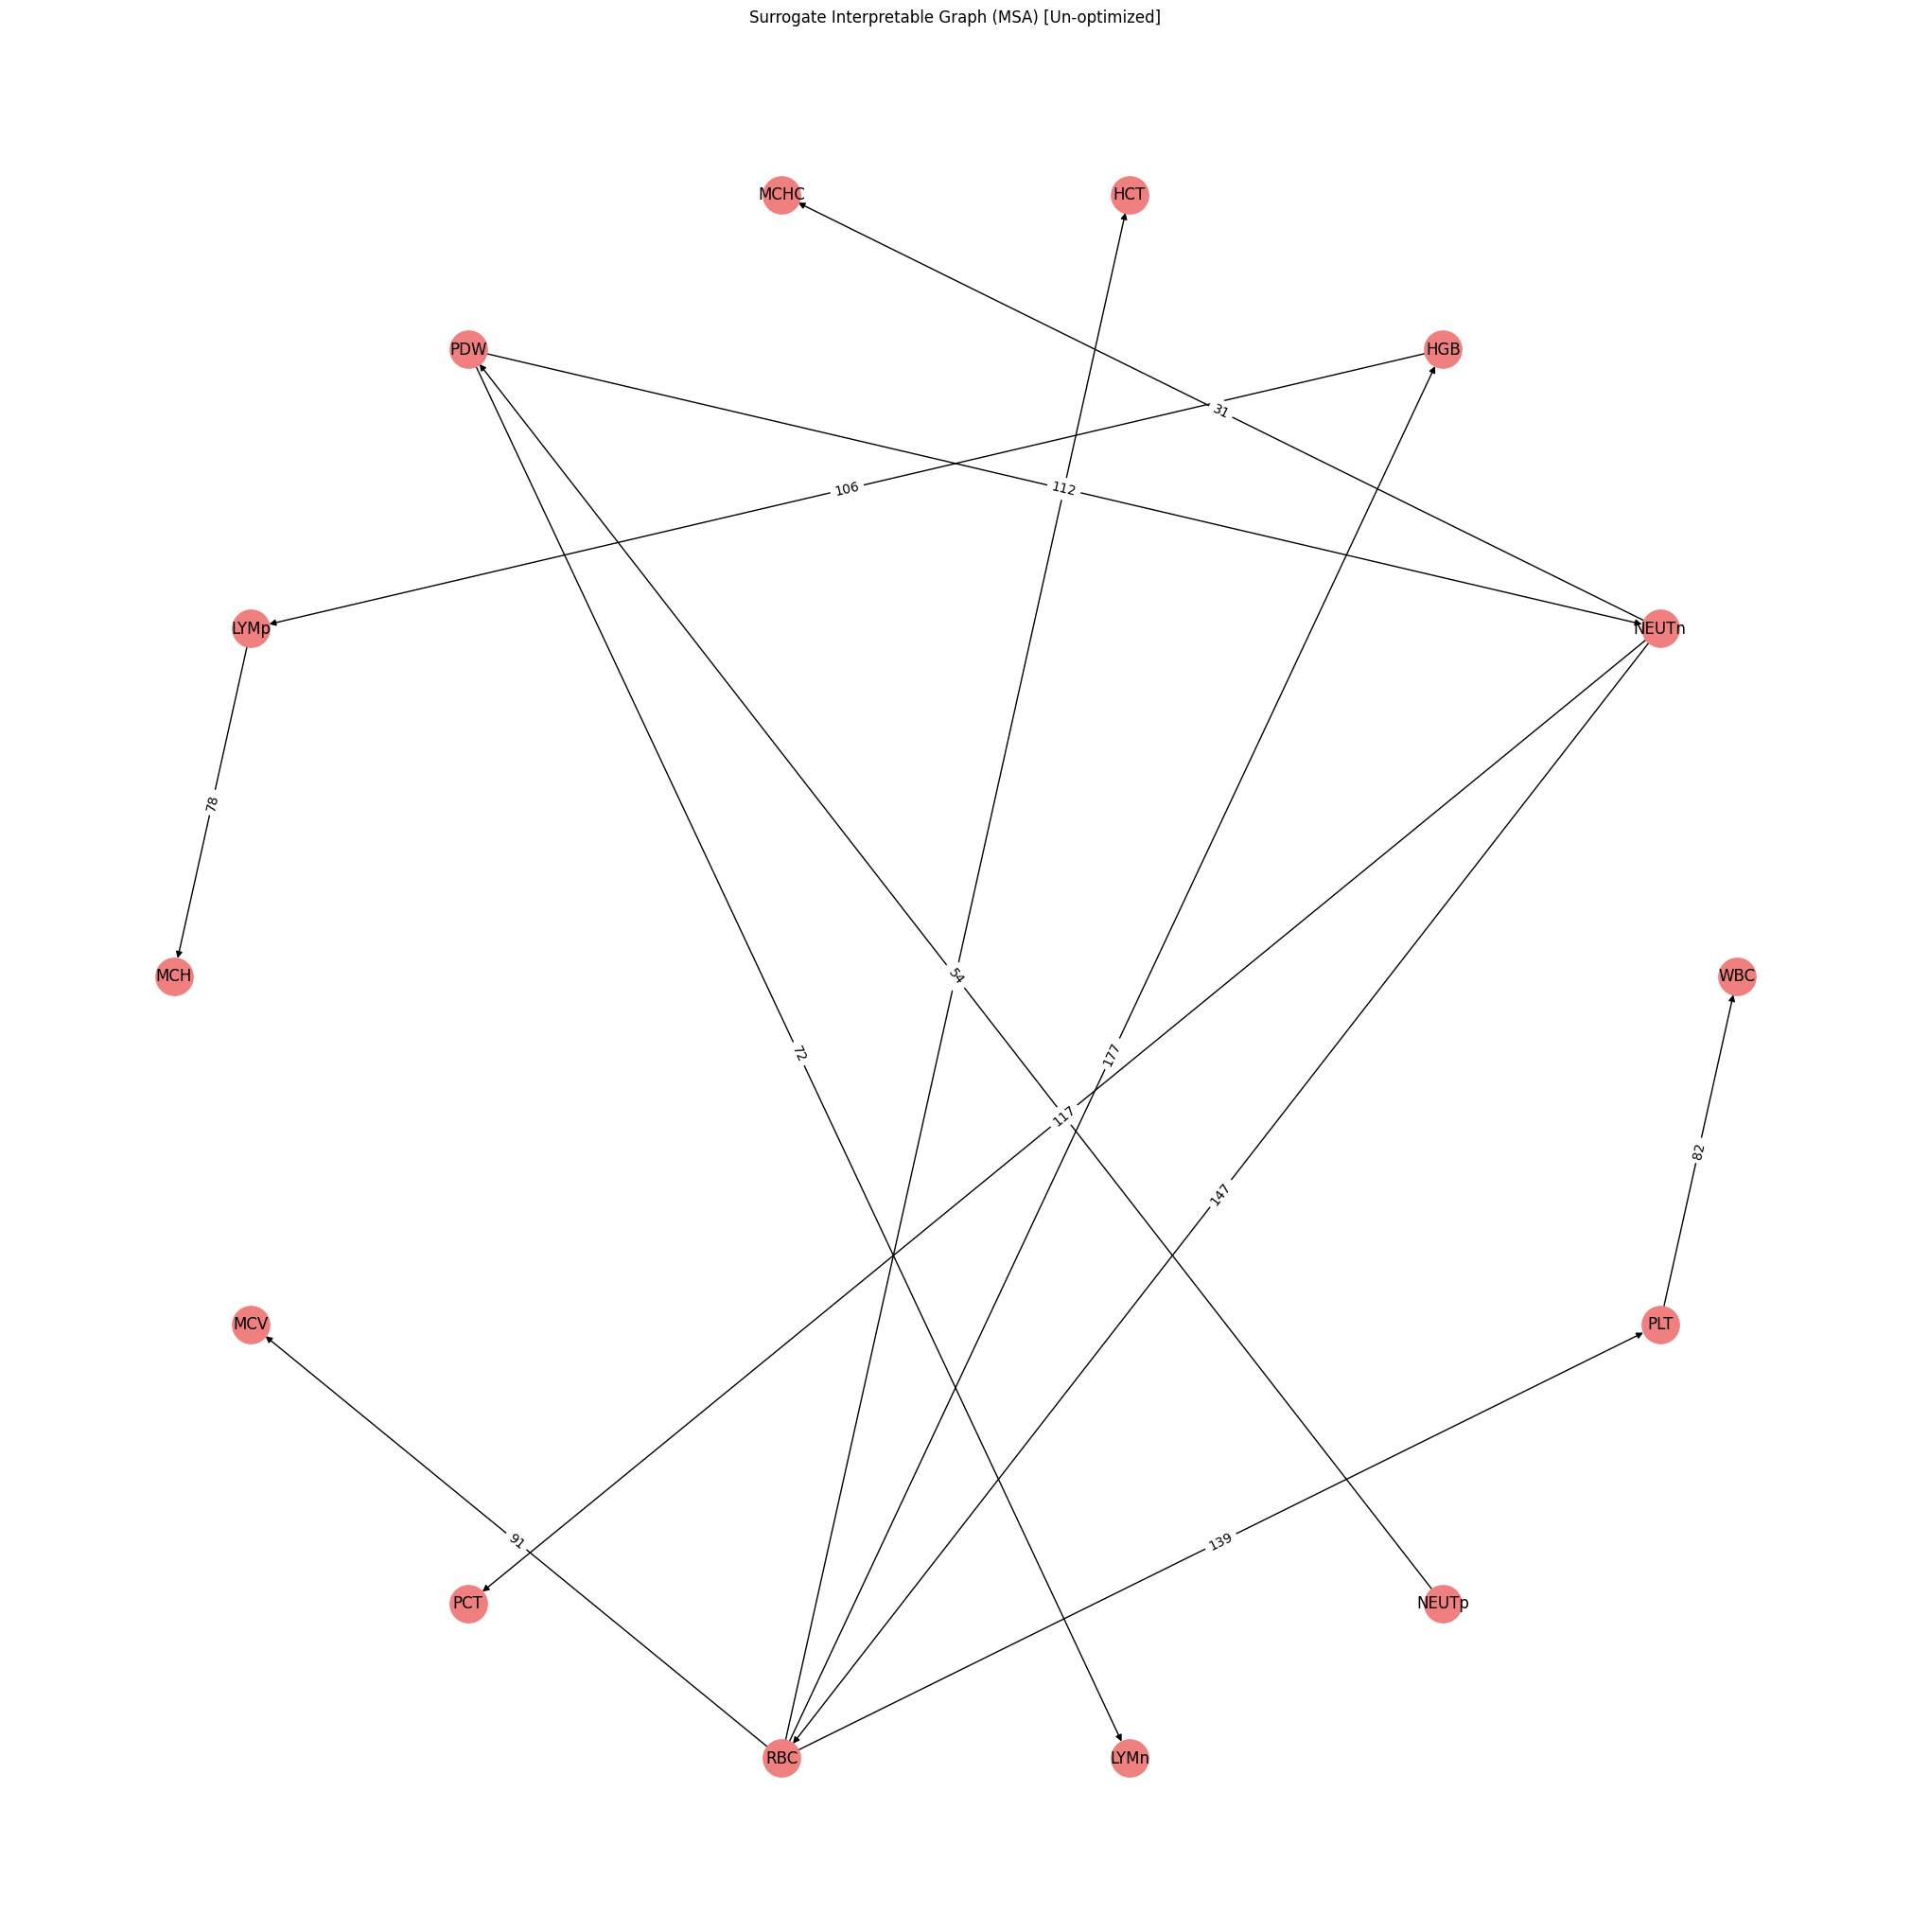

In [35]:
# Mapping from encoded feature names to actual feature names
feature_mapping = {f"FEAT_{i}": feature for i, feature in enumerate(X.columns)}

# Initialize edge weights
edge_weights = {}

# Debug: Check rule extraction and feature matching
for rule_text in encoded_rules:
    # Extract the features and thresholds
    conditions = re.findall(r'FEAT_(\d+)_\w+_([\d\.]+)', rule_text)
    
    # Debug: Print the extracted features and thresholds
    print(f"Rule: {rule_text}")
    print(f"Extracted Conditions: {conditions}")

    # Map FEAT_0, FEAT_1, ... back to actual feature names in the dataset
    features_in_rule = [feature_mapping[f"FEAT_{cond[0]}"] for cond in conditions if f"FEAT_{cond[0]}" in feature_mapping]

    # Debug: Print the features that match the dataset
    print(f"Matching Features: {features_in_rule}")

    # If features are valid, build the edges
    if len(features_in_rule) > 1:
        for i in range(len(features_in_rule) - 1):
            edge = (features_in_rule[i], features_in_rule[i+1])
            edge_weights[edge] = edge_weights.get(edge, 0) + 1

# Create a directed graph using networkx
G = nx.DiGraph()

# Add edges and their weights to the graph
for (f_from, f_to), weight in edge_weights.items():
    G.add_edge(f_from, f_to, weight=weight)

# # Debug: Check the graph before proceeding
# print(f"Graph Nodes: {list(G.nodes())}")
# print(f"Graph Edges: {list(G.edges(data=True))}")

# Create a reversed graph (H) with negated weights for minimum spanning arborescence
H = nx.DiGraph()
for u, v, d in G.edges(data=True):
    H.add_edge(u, v, weight=-d['weight'])

# Compute the Minimum Spanning Arborescence (MSA)
if len(list(H.nodes())) > 0:
    root = list(H.nodes())[0]  # Choose an arbitrary root node
    msa = nx.minimum_spanning_arborescence(H)

    # Revert the edge weights to positive after the spanning tree computation
    for u, v, d in msa.edges(data=True):
        d['weight'] = -d['weight']
    
    # Plot the graph
    plt.figure(figsize=(20, 20))
    pos = nx.circular_layout(msa)  # Using circular layout for better visualization
    edge_labels = nx.get_edge_attributes(msa, 'weight')

    # Draw the nodes, edges, and edge labels
    nx.draw(msa, pos, with_labels=True, node_size=800, node_color="lightcoral", arrowsize=10)
    nx.draw_networkx_edge_labels(msa, pos, edge_labels=edge_labels)

    plt.title("Surrogate Interpretable Graph (MSA) [Un-optimized]")
    plt.show()
else:
    print("Graph H is empty. No feature transitions were detected.")


### MILP Optimization of the Surrogate Interpretable Graph of the RF Classifier


##### Simple Linear Optimizer

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/DubeyA-Dev/miniconda3/envs/taylor/lib/python3.10/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/tk/qh_5gfz51996p7zxwjyl8r140000gp/T/a12abd657a044b0798ee1c3642d392a6-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/tk/qh_5gfz51996p7zxwjyl8r140000gp/T/a12abd657a044b0798ee1c3642d392a6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 6 COLUMNS
At line 743 RHS
At line 745 BOUNDS
At line 930 ENDATA
Problem MODEL has 1 rows, 184 columns and 184 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 1274 - 0.00 seconds
Cgl0004I processed model has 1 rows, 181 columns (181 integer (178 of which binary)) and 181 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found o

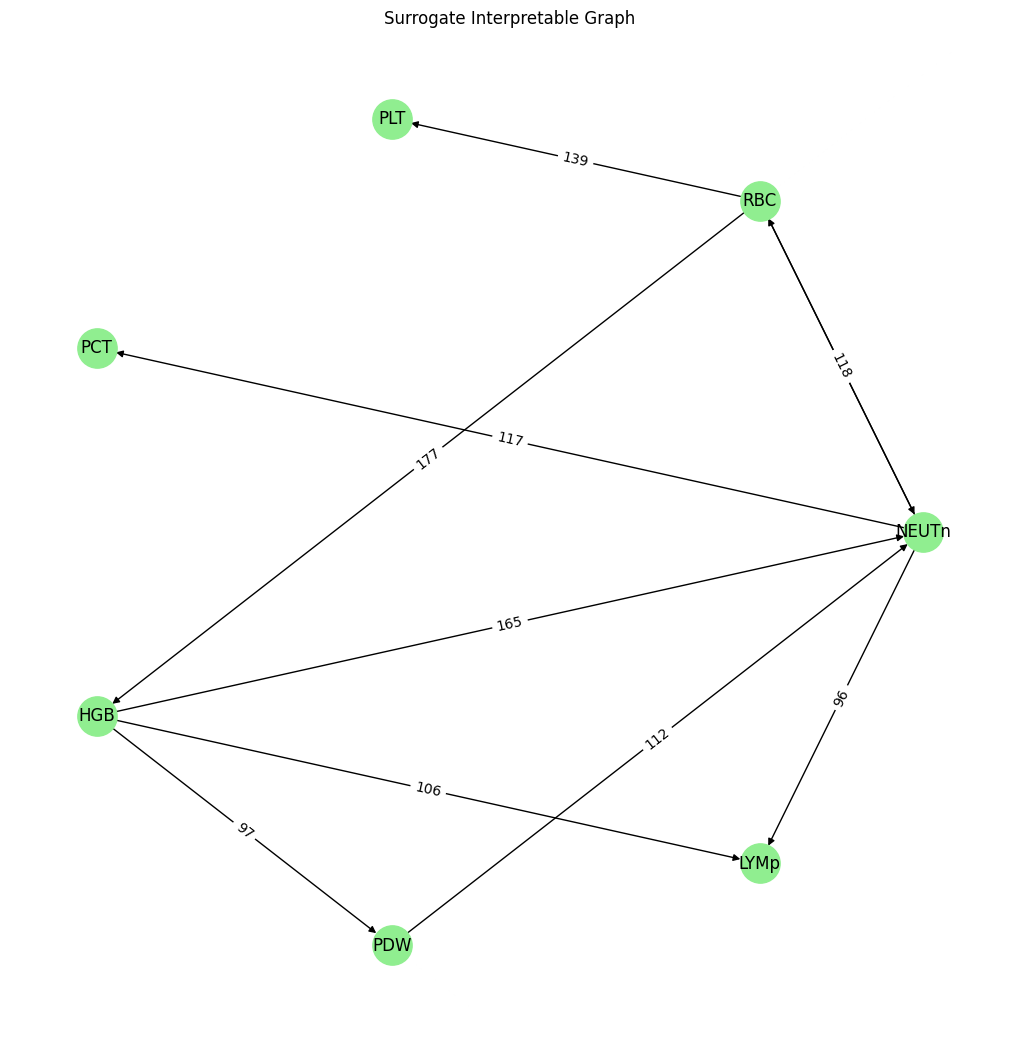

In [38]:
import networkx as nx
import matplotlib.pyplot as plt
from pulp import LpProblem, LpMaximize, LpVariable, lpSum, LpStatus

# 1. Mapping from encoded feature names to actual feature names
feature_mapping = {f"FEAT_{i}": feature for i, feature in enumerate(X.columns)}

# 2. Define edge weights (using previous code)
edge_weights = {}

# Debug: Check rule extraction and feature matching
for rule_text in encoded_rules:
    # Extract the features and thresholds
    conditions = re.findall(r'FEAT_(\d+)_\w+_([\d\.]+)', rule_text)
    
    # Map FEAT_0, FEAT_1, ... back to actual feature names in the dataset
    features_in_rule = [feature_mapping[f"FEAT_{cond[0]}"] for cond in conditions if f"FEAT_{cond[0]}" in feature_mapping]

    # If features are valid, build the edges
    if len(features_in_rule) > 1:
        for i in range(len(features_in_rule) - 1):
            edge = (features_in_rule[i], features_in_rule[i+1])
            edge_weights[edge] = edge_weights.get(edge, 0) + 1

# 3. Define maximum number of edges to select (surrogate graph size)
max_edges = 10

# 4. Create MILP problem: maximize sum of weights of selected edges subject to selecting <= max_edges.
prob = LpProblem("Surrogate_Graph_Selection", LpMaximize)

# 5. Create a binary variable for each edge in edge_dict
edge_vars = {edge: LpVariable(f"edge_{edge[0]}_{edge[1]}", cat='Binary')
             for edge in edge_weights.keys()}

# 6. Objective: maximize total weight of selected edges
prob += lpSum([edge_weights[edge] * edge_vars[edge] for edge in edge_vars]), "Total_Weight"

# 7. Constraint: number of selected edges <= max_edges
prob += lpSum([edge_vars[edge] for edge in edge_vars]) <= max_edges, "EdgeCountConstraint"

# 8. Solve the MILP problem
prob.solve()

print("MILP Status:", LpStatus[prob.status])

# 9. Extract selected edges from the MILP solution
# 9. Extract selected edges from the MILP solution
selected_edges = [edge for edge in edge_vars if edge_vars[edge].value() == 1]
print("Selected edges for surrogate graph:", selected_edges)


# 10. Build surrogate graph from selected edges
G_surrogate = nx.DiGraph()
for edge in selected_edges:
    G_surrogate.add_edge(edge[0], edge[1], weight=edge_weights[edge])

# 11. Visualize the surrogate graph
plt.figure(figsize=(10, 10))
pos = nx.circular_layout(G_surrogate)
edge_labels = nx.get_edge_attributes(G_surrogate, 'weight')
nx.draw(G_surrogate, pos, with_labels=True, node_size=800, node_color="lightgreen", arrowsize=10)
nx.draw_networkx_edge_labels(G_surrogate, pos, edge_labels=edge_labels)
plt.title("Surrogate Interpretable Graph")
plt.show()


## The surrogate interpretable graph also analyzes the co-occurence of a feature during a decision and whether that feature can occur without the other or not. This is very difficult to analyze through traditional methods of interpretability of random forest models.

### How the subset of the features are important for arriving at a decision. Analyze two-way/single-way arrows for decision process

## Analyzing conuterfactual for each of the tree within the search limit parameters

## Counterfactual for each tree (aggregate analysis) of the RF Classifier

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.inspection import DecisionBoundaryDisplay

def ensemble_counterfactual_analysis(instance, rf_model, feature_names, 
                                    step=0.5, max_iter=500, target_class=None):
    """
    Advanced counterfactual analysis across Random Forest subtrees
    Returns:
    - (dict) Aggregate counterfactual statistics per feature
    - (dict) Individual tree counterfactual data
    - (matplotlib.figure) Visualizations
    """
    # Initialize data structures
    n_trees = len(rf_model.estimators_)
    n_features = len(feature_names)
    tree_data = []
    aggregate_results = {feat: {'deltas': [], 'success_rate': 0} 
                        for feat in feature_names}
    
    # Create progress bar for tree analysis
    with tqdm(total=n_trees, desc="Analyzing Subtrees") as pbar:
        for tree_idx, tree in enumerate(rf_model.estimators_):
            # Get original prediction from this subtree
            orig_pred = tree.predict(instance.reshape(1, -1))[0]
            target = 1 - orig_pred if target_class is None else target_class
            
            tree_results = {}
            
            # Analyze each feature
            for feat_idx, feat_name in enumerate(feature_names):
                found_cf = False
                # Try both perturbation directions
                for direction in [-1, 1]:
                    perturbed = instance.copy()
                    for i in range(max_iter):
                        perturbed[feat_idx] += direction * step * (i+1)
                        new_pred = tree.predict(perturbed.reshape(1, -1))[0]
                        if new_pred == target:
                            tree_results[feat_name] = {
                                'delta': direction * step * (i+1),
                                'iterations': i+1,
                                'direction': 'decrease' if direction == -1 else 'increase'
                            }
                            aggregate_results[feat_name]['deltas'].append(direction * step * (i+1))
                            found_cf = True
                            break
                    if found_cf:
                        break
                if not found_cf:
                    tree_results[feat_name] = {'delta': np.nan, 'iterations': max_iter}
            
            tree_data.append(tree_results)
            pbar.update(1)
    
    # Calculate success rates
    for feat in aggregate_results:
        successes = len([d for d in aggregate_results[feat]['deltas'] if not np.isnan(d)])
        aggregate_results[feat]['success_rate'] = successes / n_trees
    
    # Generate visualizations
    plt.figure(figsize=(30, 28))
    
    # 1. Feature Importance Heatmap
    plt.subplot(2, 2, 1)
    success_rates = [aggregate_results[feat]['success_rate'] for feat in feature_names]
    plt.imshow(np.array(success_rates).reshape(1, -1), cmap='viridis', aspect='auto')
    plt.colorbar(label='Success Rate')
    plt.yticks([])
    plt.xticks(np.arange(len(feature_names)), feature_names, rotation=90)
    plt.title('Counterfactual Success Rate Across Trees')
    
    # 2. Delta Distribution Swarm Plot
    plt.subplot(2, 2, 2)
    all_deltas = []
    for feat in feature_names:
        deltas = [d for d in aggregate_results[feat]['deltas'] if not np.isnan(d)]
        jitter = np.random.normal(loc=0, scale=0.1, size=len(deltas))
        plt.scatter(np.arange(len(deltas)) + jitter, deltas, 
                    alpha=0.3, label=feat)
    plt.axhline(0, color='gray', linestyle='--')
    plt.ylabel('Required Delta')
    plt.xlabel('Feature Index')
    plt.title('Perturbation Magnitude Distribution')
    
    # 3. Direction Consistency Plot
    plt.subplot(2, 2, 3)
    direction_counts = {feat: {'increase': 0, 'decrease': 0} 
                       for feat in feature_names}
    for tree in tree_data:
        for feat, res in tree.items():
            if 'direction' in res:
                direction_counts[feat][res['direction']] += 1
                
    width = 0.4
    for idx, feat in enumerate(feature_names):
        plt.bar(idx - width/2, direction_counts[feat]['increase'], 
               width=width, color='green')
        plt.bar(idx + width/2, direction_counts[feat]['decrease'], 
               width=width, color='red')
    plt.xticks(np.arange(len(feature_names)), feature_names, rotation=90)
    plt.ylabel('Count')
    plt.title('Direction Consistency Across Trees')
    plt.legend(['Increase', 'Decrease'])
    
    # 4. Decision Boundary Projection
    plt.subplot(2, 2, 4)
    top_feature = sorted(feature_names, 
                        key=lambda x: aggregate_results[x]['success_rate'])[-1]
    feat_idx = feature_names.index(top_feature)
    
    # Generate probability curve for top feature
    feat_values = np.linspace(instance[feat_idx] - 3*step*max_iter,
                            instance[feat_idx] + 3*step*max_iter, 100)
    probabilities = []
    
    for val in feat_values:
        modified = instance.copy()
        modified[feat_idx] = val
        # Get average probability across all trees
        avg_prob = np.mean([tree.predict_proba(modified.reshape(1, -1))[0][target_class] 
                          for tree in rf_model.estimators_])
        probabilities.append(avg_prob)
    
    plt.plot(feat_values, probabilities, color='navy', lw=2)
    plt.axvline(instance[feat_idx], color='red', linestyle='--', label='Original Value')
    plt.axhline(0.5, color='gray', linestyle=':', label='Decision Threshold')
    plt.xlabel(top_feature)
    plt.ylabel('Average Class Probability')
    plt.title(f'Probability Landscape for {top_feature}')
    plt.legend()
    
    plt.tight_layout()
    return aggregate_results, tree_data

#### This also enables directional consistency evaluations

In [43]:
X

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT
0,10.00,43.200,50.100,4.30000,5.00000,2.77,7.3,24.2000,87.7,26.3,30.1,189.0,12.500000,0.17000
1,10.00,42.400,52.300,4.20000,5.30000,2.84,7.3,25.0000,88.2,25.7,20.2,180.0,12.500000,0.16000
2,7.20,30.700,60.700,2.20000,4.40000,3.97,9.0,30.5000,77.0,22.6,29.5,148.0,14.300000,0.14000
3,6.00,30.200,63.500,1.80000,3.80000,4.22,3.8,32.8000,77.9,23.2,29.8,143.0,11.300000,0.12000
4,4.20,39.100,53.700,1.60000,2.30000,3.93,0.4,316.0000,80.6,23.9,29.7,236.0,12.800000,0.22000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,4.40,25.845,77.511,1.88076,5.14094,4.86,13.5,46.1526,80.7,27.7,34.4,180.0,14.312512,0.26028
1277,5.60,25.845,77.511,1.88076,5.14094,4.85,15.0,46.1526,91.7,31.0,33.8,215.0,14.312512,0.26028
1278,9.20,25.845,77.511,1.88076,5.14094,4.47,13.1,46.1526,88.7,29.3,33.0,329.0,14.312512,0.26028
1279,6.48,25.845,77.511,1.88076,5.14094,4.75,13.2,46.1526,86.7,27.9,32.1,174.0,14.312512,0.26028


/Users/DubeyA-Dev/miniconda3/envs/taylor/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
Analyzing Subtrees: 100%|██████████| 10/10 [00:00<00:00, 11.55it/s]


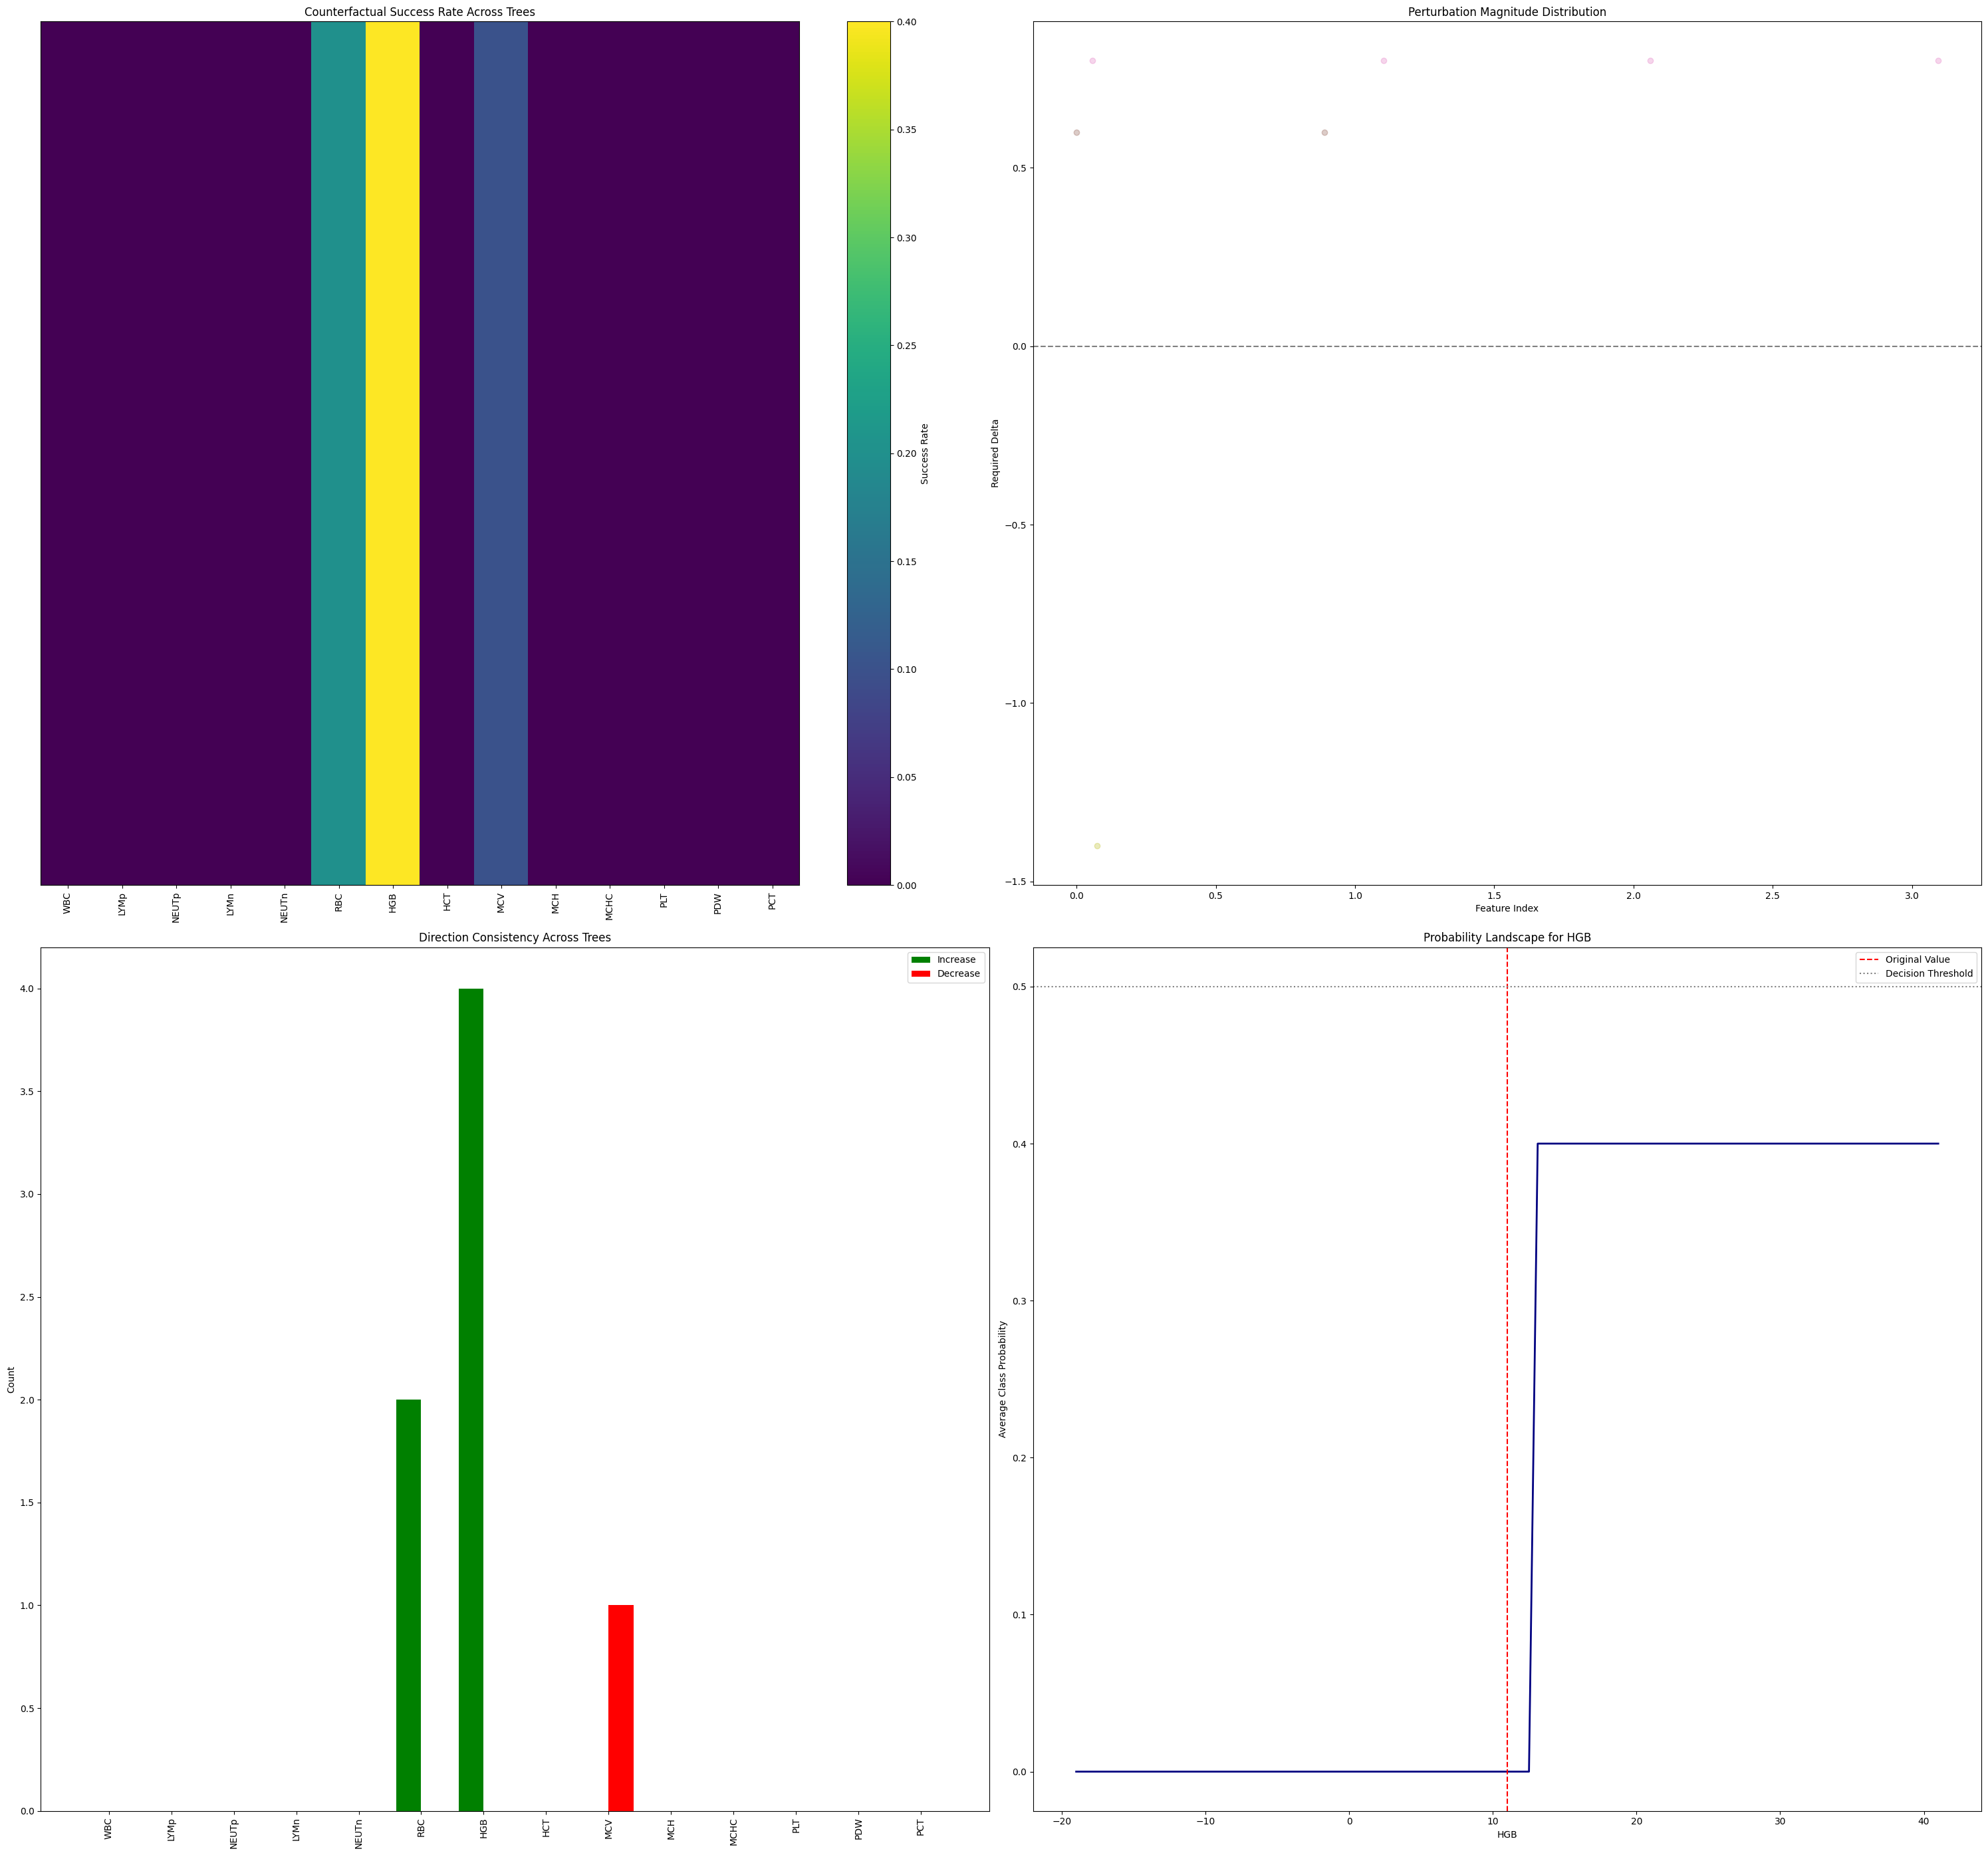

In [44]:
# First get the global target class
instance = X.iloc[10].values
forest_pred = rf.predict(instance.reshape(1, -1))[0]
target_class = 5 - forest_pred  # Flip the prediction

agg_results, tree_data = ensemble_counterfactual_analysis(
    instance=instance,
    rf_model=rf,
    feature_names=list(X.columns),
    step=0.2,
    max_iter=50,
    target_class=target_class  # Explicit target class
)

## SHAP Comparison

In [49]:
import shap
explainer = shap.TreeExplainer(rf)
explanation = explainer.shap_values(X)

# make sure the SHAP values add up to marginal predictions


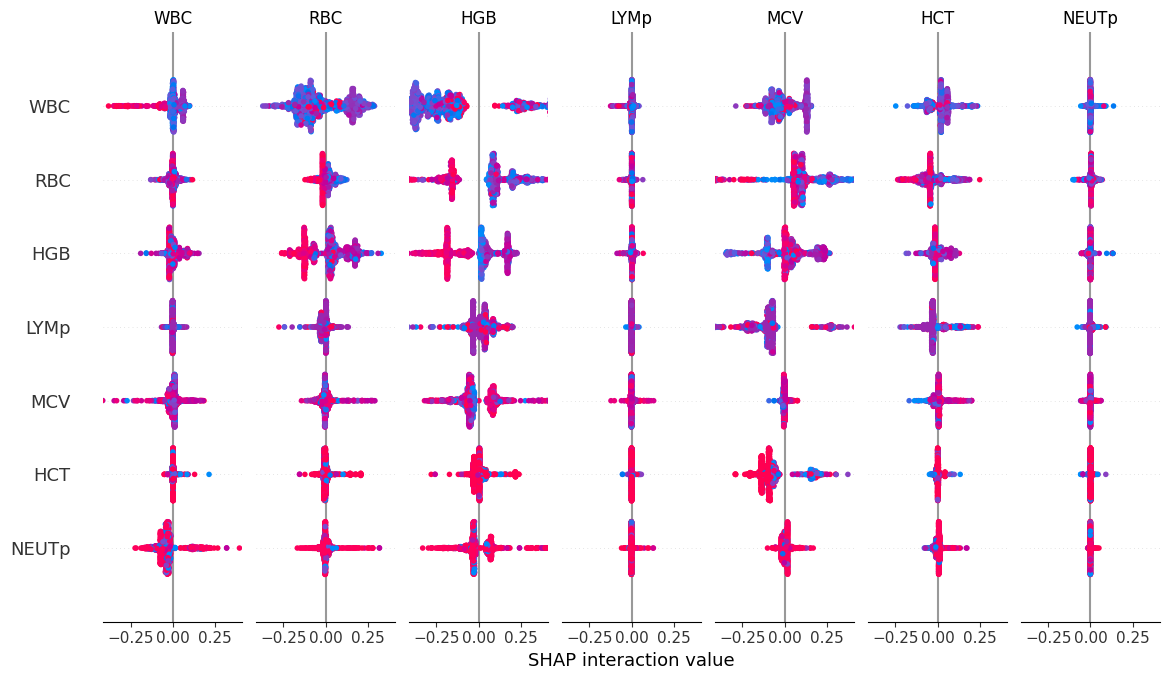

In [50]:
shap.summary_plot(shap_values, X)